# Linear Regression

Linear Regression is usually the first machine learning algorithm that every data scientist comes across. It is a simple model but everyone needs to master it as it lays the foundation for other machine learning algorithms.

## Where can Linear Regression be used? 
It is a very powerful technique and can be used to understand the factors that influence profitability. It can be used to forecast sales in the coming months by analyzing the sales data for previous months. It can also be used to gain various insights about customer behaviour. By the end of the blog we will build a model which looks like the below picture i.e, determine a line which best fits the data.

![](https://cdn-images-1.medium.com/max/800/1*LEmBCYAttxS6uI6rEyPLMQ.png)

## Objective of Linear Regression

The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

## Hypothesis of Linear Regression

The linear regression model can be represented by the following equation


![](https://cdn-images-1.medium.com/max/800/1*A32yDrkQKIU0Z-Nf7JD9Pg.png)

Where:

    Y is the predicted value
    θ₀ is the bias term.
    θ₁,…,θₙ are the model parameters
    x₁, x₂,…,xₙ are the feature values.

The above hypothesis can also be represented by

![](https://cdn-images-1.medium.com/max/800/1*7pjcby7gESbxk54njwCUZg.png)

where

    θ is the model’s parameter vector including the bias term θ₀
    x is the feature vector with x₀ =1

## Using Scikit-Learn model

**class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)**

Parameters:	

fit_intercept : boolean, optional, default True

    whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
normalize : boolean, optional, default False

    This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
copy_X : boolean, optional, default True

    If True, X will be copied; else, it may be overwritten.
n_jobs : int or None, optional (default=None)

    The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_) 
reg.predict(np.array([[3, 5]]))

1.0
[1. 2.]
3.0000000000000018


array([16.])

## Related Methods

fit(self, X, y[, sample_weight]) 	Fit linear model.

get_params(self[, deep]) 	Get parameters for this estimator.

predict(self, X) 	Predict using the linear model

score(self, X, y[, sample_weight]) 	Returns the coefficient of determination R^2 of the prediction.

set_params(self, \*\*params) 	Set the parameters of this estimator.

## Implementation in Python

In [5]:
# Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [6]:
link="D:/As a Trainer/Course Material/Machine Learning with Python/All Special/Linear Regression/"
data = pd.read_csv(link+'train.csv')
print(data.describe())

# Removing any data point above x = 100
# There is only one record
data = data[data.x <= 100]

                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [7]:
# Separating dependednt & Indepented Variables 
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1]

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
print(x[:10])
print('\n')
print(y[:10])

[[24.]
 [50.]
 [15.]
 [38.]
 [87.]
 [36.]
 [12.]
 [81.]
 [25.]
 [ 5.]]


0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
6    10.780897
7    80.763399
8    24.612151
9     6.963319
Name: y, dtype: float64


### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)

### Visualization
#### Check the fitting on training set

Text(0,0.5,'Y-Train')

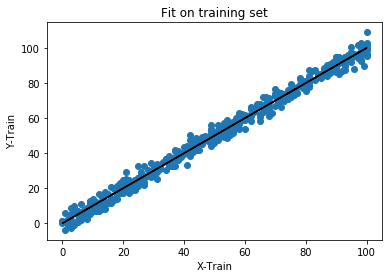

In [12]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='black')
plt.title('Fit on training set')
plt.xlabel('X-Train')
plt.ylabel('Y-Train')

### Check fitting on validation set

Text(0,0.5,'Y-Test')

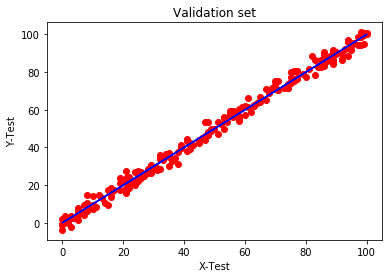

In [13]:
plt.scatter(x_test, y_test, color='r')
plt.plot(x_test, pred, color='b')
plt.title('Validation set')
plt.xlabel('X-Test')
plt.ylabel('Y-Test')

### Final test on Test Set

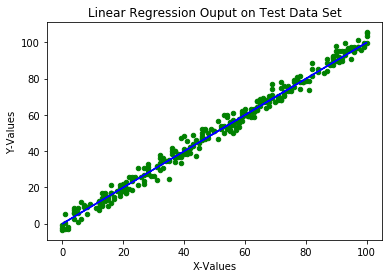

In [14]:
test = pd.read_csv(link+'test.csv')
test.plot.scatter('x', 'y', color='g')
plt.plot(test['x'], regressor.predict(test.iloc[:,0:1].values), color='blue')
plt.title('Linear Regression Ouput on Test Data Set')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.show()

## Analysis of USA Housing Data

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#sns.set_style('whitegrid')

### Loading Data and Checking

In [17]:
linkdir=link

In [18]:
USA_Housing = pd.read_csv(linkdir+'USA_Housing.csv')
USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Dataset Info

In [19]:
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


#### Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN value.

In [20]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Exploratory Data Analysis

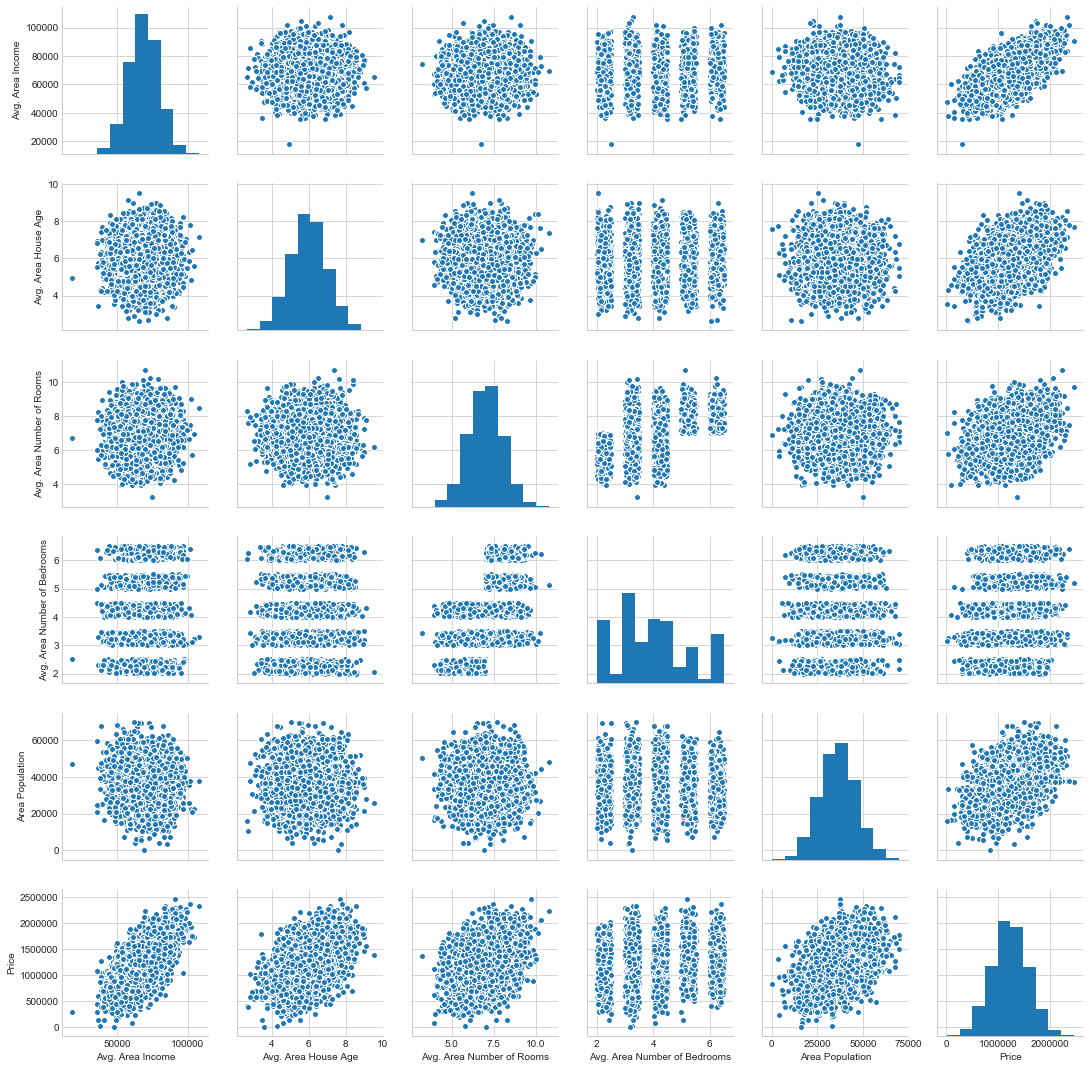

In [85]:
sns.pairplot(USA_Housing)

#### Check For Null Value

In [87]:
USA_Housing.isna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


#### Checking for NULL Values in dataset

In [89]:
USA_Housing[USA_Housing.isna().any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [91]:
USA_Housing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Creating profile Report for USA_Housing

In [94]:
import pandas_profiling
pandas_profiling.ProfileReport(USA_Housing)

Number of variables,7
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,273.5 KiB
Average record size in memory,56.0 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


#### Distribution of Housing Price Across USA

C:\Users\Subhadeep Chakrabort\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


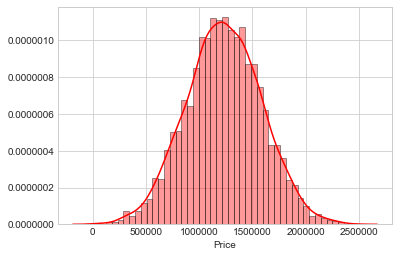

In [27]:
sns.distplot(USA_Housing['Price'],hist_kws=dict(edgecolor="black", linewidth=1),color='red')

#### Displaying correlation among all the columns 

In [28]:
USA_Housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


#### Displaying correlation among all the columns using Heat Map

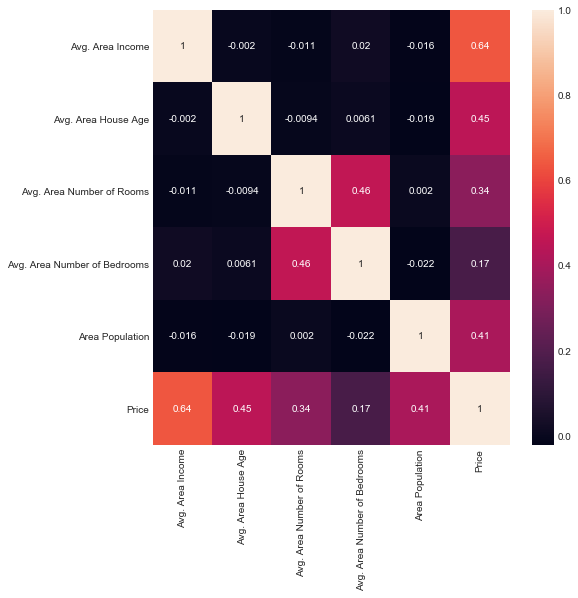

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(USA_Housing.corr(), annot = True)

### Training a Linear Regression Model

In [32]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### Taking Colums as X features 

In [33]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

#### Selecting Target variable in y

In [34]:
y = USA_Housing['Price']

#### Spliting dataset in Train and Test to train the algorithm

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### importing the Linear Regression Algorithm and Creating Linear Regression Object

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

#### Displaying Intercept & Coefficient

In [39]:
print(lm.intercept_)

-2640159.796851911


In [40]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


#### Displaying Coefficients of all attributes

In [41]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


#### Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52
    
    Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28
    
    Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67
    
    Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80
    
    Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15 



### Prediction of the Model

In [44]:
predictions = lm.predict(X_test)

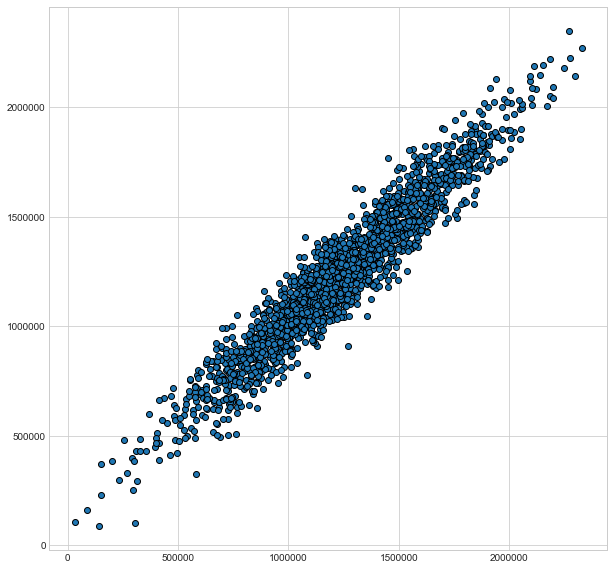

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, edgecolor='black')

In [99]:
pred=lm.predict([USA_Housing.iloc[0][:5]])
print(pred)

[1225941.63882624]


### Price Prediction Section

In [106]:
print("Please Enter Necessarry Values:\n")
[a,b,c,d,e]=eval(input('Avg. Area Income')),eval(input('Avg. Area House Age')),eval(input('Avg. Area Number of Rooms')),eval(input('Avg. Area Number of Bedrooms')),eval(input('Area Population'))

Please Enter Necessarry Values:

Avg. Area Income80000
Avg. Area House Age6
Avg. Area Number of Rooms8
Avg. Area Number of Bedrooms5
Area Population27000


In [107]:
pred=lm.predict([[a,b,c,d,e]])
print("Predicted Price: ",pred)

Predicted Price:  [1470581.71072957]


### Showing Model Score for the Evaluation

In [48]:
from sklearn import metrics
print("Model Score: ",lm.score(X,y))

Model Score:  0.9179558725201041
